# Flexure Bending Calculations

We will use a flexure to constrain the rotary motion of the tip. The first version used a fixed-fixed setup, where the slope of the tube tip was fixed to be zero. This is "nicer" in that it means the wire comes out straight toward the substrate, but it doubles the bending stress in the tube. Instead, I want to try emulating the fixed-free bending of a normal cantilevered beam. This should reduce the stress in the beam which could allow larger orbit radii to be used in the future.

Some terms for later:
- $ P $ - Applied load on the end of the beam [N]
- $ L $ - Length of the beam [mm]
- $ E $ - Young's Modulus aka the modulus of elasticity [N/mm^2 or MPa]
- $ I $ - Second moment of area around the bending axis [mm^4]
- $ \theta $ - Slope of the beam at the end where 0 rad is perfectly horizontal (i.e. undeflected) [rad]
- $ \delta $ - Displacement of the beam at the end, in this case the applied condition [mm]

A quick Google search comes up with the following image of a fixed-free beam loaded at the tip. Remember that in this scenario, the deflection is being applied and the load is the result, but that only requires some slight rearranging of the equation.

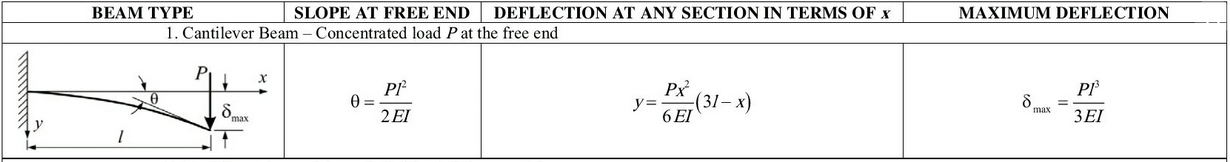

First solving for $ P $ in the deflection equation: $ P = \frac{3\delta EI}{L^3} $

Then substitute into the equation for slope: $ \theta = \frac{PL^2}{2EI} = \frac{3\delta}{2L}$

The maximum bending stress in tension/compression is $ \sigma = \frac{rM}{I} $ where $ M $ is the maximum bending moment, which is simply $ PL $. Substituting this and the prior definition for $ P $ into the stress equation: $ \sigma = \frac{3rPL}{I} = \frac{9\delta Er}{L^2} $

These equations can be interpreted as showing stress decreasing quadratically with length and increasing linearly with radius. This guides us toward using the thinnest, longest tube possible to achieve the desired result. The slope also decreases linearly with length, so a longer tube will also help make the tube "straighter" at the exit. Running the numbers for the as-built setup:

In [1]:
delta = 1
OD = 3
ID = 1
L = 300
E = 200000
I = 3.1415*(OD**4 - ID**4)/64

theta = 1.5*delta/L
sigma = 4.5*delta*E*OD/L**2

print("End slope of {} rad or {} degrees with peak stress of {} MPa.".format(theta,theta*180/3.1415,sigma))

End slope of 0.005 rad or 0.28648734680884924 degrees with peak stress of 30.0 MPa.


In the scenario where the tube yield stress $ \sigma_{ys} $ and a factor of safety $ F $ are known, the maximum acceptable deflection can be found: $ \delta_{max} = \frac{L^2 \sigma_{ys}}{9FEr} $ 

In [2]:
sigma_ys = 200
F = 2
delta_max = L**2*sigma_ys/9/F/E/OD*2

print("Max acceptable deflection of {} mm.".format(delta_max))

Max acceptable deflection of 3.3333333333333335 mm.
